In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import six

sns.set(style='ticks', context='paper', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})


import bonvoyage

%load_ext autoreload
%autoreload 2

# Figures in the notebook
%matplotlib inline

# Set random seed
np.random.seed(sum(map(ord, 'bonvoyage')))


# Define folder to save figures
folder = 'figures/anchor/sfig_10'
!mkdir -p $folder


/home/obotvinnik/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Show seed data dataset

In [2]:
from anchor.infotheory import bin_range_strings

In [3]:
bin_names = bin_range_strings(bonvoyage.Waypoints.bins)
bin_names

['0.0-0.1',
 '0.1-0.2',
 '0.2-0.3',
 '0.3-0.4',
 '0.4-0.5',
 '0.5-0.6',
 '0.6-0.7',
 '0.7-0.8',
 '0.8-0.9',
 '0.9-1.0']

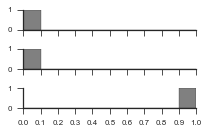

In [4]:
seed_data = bonvoyage.Waypoints.seed_data

fig, axes = plt.subplots(figsize=(3, 2), nrows=3, sharex=True, sharey=True)

width = 1

for (i, row), ax in zip(seed_data.iterrows(), axes):
    ax.bar(row.index, row.values, width=width, color='grey')
sns.despine()
xticks = np.arange(row.shape[0]+1)
ax.set(yticks=(0, 1), xticks=xticks, xticklabels=xticks/10.)
fig.tight_layout()
fig.savefig('{}/bonvoyage_seed_data.pdf'.format(folder))

## Make "Maybe Everything" test dataset

In [5]:
size = 100

perfectly1 = np.ones(size).reshape(size, 1)
perfectly0 = np.zeros(size).reshape(size, 1)
perfectly_middle = 0.5*np.ones(size).reshape(size, 1)
maybe_middles_0 = np.vstack([np.concatenate([np.zeros(i), np.ones(size-i)*0.5]) for i in range(1, size)]).T
maybe_middles_1 = np.vstack([np.concatenate([np.ones(i), np.ones(size-i)*0.5]) for i in range(1, size)]).T
maybe_bimodals = np.vstack([np.concatenate([np.zeros(i), np.ones(size-i)]) for i in range(1, size)]).T

columns = ['perfect_middle'.format(str(i).zfill(2)) for i in range(perfectly_middle.shape[1])] \
    + ['middle0_{}'.format(str(i).zfill(2)) for i in range(maybe_middles_0.shape[1])] \
    + ['middle1_{}'.format(str(i).zfill(2)) for i in range(maybe_middles_1.shape[1])] \
    + ['bimodal_{}'.format(str(i).zfill(2)) for i in range(maybe_bimodals.shape[1])] \
    + ['perfect_included', 'perfect_excluded']

data = np.hstack([perfectly_middle, maybe_middles_0, maybe_middles_1, maybe_bimodals, perfectly1, perfectly0])
maybe_everything = pd.DataFrame(data, columns=columns)
six.print_(maybe_everything.shape)
maybe_everything.head()

(100, 300)


,perfect_middle,middle0_00,middle0_01,middle0_02,middle0_03,middle0_04,middle0_05,middle0_06,middle0_07,middle0_08,...,bimodal_91,bimodal_92,bimodal_93,bimodal_94,bimodal_95,bimodal_96,bimodal_97,bimodal_98,perfect_included,perfect_excluded
0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.5,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.5,0.5,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.5,0.5,0.5,0.5,0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [6]:
from anchor.simulate import add_noise

In [19]:
maybe_everything_noisy = add_noise(maybe_everything, iteration_per_noise=10, 
                                   noise_percentages=np.arange(0, 100, 5), plot=False)
six.print_(maybe_everything_noisy.shape)
maybe_everything_noisy.head()

(100, 57300)


,perfect_middle_noise0_iter0,middle0_00_noise0_iter0,middle0_01_noise0_iter0,middle0_02_noise0_iter0,middle0_03_noise0_iter0,middle0_04_noise0_iter0,middle0_05_noise0_iter0,middle0_06_noise0_iter0,middle0_07_noise0_iter0,middle0_08_noise0_iter0,...,bimodal_91_noise95_iter9,bimodal_92_noise95_iter9,bimodal_93_noise95_iter9,bimodal_94_noise95_iter9,bimodal_95_noise95_iter9,bimodal_96_noise95_iter9,bimodal_97_noise95_iter9,bimodal_98_noise95_iter9,perfect_included_noise95_iter9,perfect_excluded_noise95_iter9
0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.589527,0.774932,0.499504,0.150024,0.380721,0.810271,0.485884,0.549952,0.808396,0.996400
1,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.341090,0.505881,0.186781,0.778117,0.172168,0.683624,0.083816,0.243291,0.449720,0.731521
2,0.5,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
3,0.5,0.5,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.826827,0.361595,0.797055,0.316820,0.650798,0.158716,0.320548,0.981323,0.985146,0.658254
4,0.5,0.5,0.5,0.5,0.5,0.0,0.0,0.0,0.0,0.0,...,0.414055,0.679284,0.123933,0.273319,0.668118,0.262305,0.260800,0.027293,0.845871,0.309283


In [34]:
data = maybe_everything_noisy.columns.map(lambda x: x.split('_'))
type(data)

numpy.ndarray

In [35]:
type(data[0])

list

## Save the data

In [20]:
maybe_everything_noisy.to_csv('data.csv')

## Transform to waypoints

In [21]:
# Initialize the waypoints transformer
ws = bonvoyage.Waypoints()

waypoints = ws.fit_transform(maybe_everything_noisy)
six.print_(waypoints.shape)
waypoints.head()

(57300, 2)


,0,1
perfect_middle_noise0_iter0,0.00,0.0
middle0_00_noise0_iter0,0.01,0.0
middle0_01_noise0_iter0,0.02,0.0
middle0_02_noise0_iter0,0.03,0.0
middle0_03_noise0_iter0,0.04,0.0


In [22]:
waypoints.to_csv('waypoints.csv')

### Plot a subset of the data with violinplots

In [38]:
tidy = maybe_everything_noisy.unstack().reset_index()
tidy = tidy.rename(columns={'level_0':'Feature ID', 'level_1': "Sample ID", 0:'$\Psi$'})
six.print_(tidy.shape)
tidy.head()

(5730000, 3)


,Feature ID,Sample ID,$\Psi$
0,perfect_middle_noise0_iter0,0,0.5
1,perfect_middle_noise0_iter0,1,0.5
2,perfect_middle_noise0_iter0,2,0.5
3,perfect_middle_noise0_iter0,3,0.5
4,perfect_middle_noise0_iter0,4,0.5


In [39]:
tidy['Iteration'] = tidy['Feature ID'].str.extract('iter(\d+)').astype(int)
tidy['% Noise'] = tidy['Feature ID'].str.extract('noise(\d+)').astype(int)
tidy.head()

/home/obotvinnik/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':
/home/obotvinnik/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app


,Feature ID,Sample ID,$\Psi$,Iteration,% Noise
0,perfect_middle_noise0_iter0,0,0.5,0,0
1,perfect_middle_noise0_iter0,1,0.5,0,0
2,perfect_middle_noise0_iter0,2,0.5,0,0
3,perfect_middle_noise0_iter0,3,0.5,0,0
4,perfect_middle_noise0_iter0,4,0.5,0,0


In [54]:
feature_id_data = pd.DataFrame.from_records(list(data), index=maybe_everything_noisy.columns)
feature_id_data.columns = feature_id_data.columns.map(lambda x: 'id{}'.format(x))
print(feature_id_data.shape)
feature_id_data.head()

(57300, 4)


,id0,id1,id2,id3
perfect_middle_noise0_iter0,perfect,middle,noise0,iter0
middle0_00_noise0_iter0,middle0,00,noise0,iter0
middle0_01_noise0_iter0,middle0,01,noise0,iter0
middle0_02_noise0_iter0,middle0,02,noise0,iter0
middle0_03_noise0_iter0,middle0,03,noise0,iter0


In [55]:
tidy_metadata = tidy.join(feature_id_data, on='Feature ID')
print(tidy.shape)
tidy_metadata.head()

(5730000, 5)


,Feature ID,Sample ID,$\Psi$,Iteration,% Noise,id0,id1,id2,id3
0,perfect_middle_noise0_iter0,0,0.5,0,0,perfect,middle,noise0,iter0
1,perfect_middle_noise0_iter0,1,0.5,0,0,perfect,middle,noise0,iter0
2,perfect_middle_noise0_iter0,2,0.5,0,0,perfect,middle,noise0,iter0
3,perfect_middle_noise0_iter0,3,0.5,0,0,perfect,middle,noise0,iter0
4,perfect_middle_noise0_iter0,4,0.5,0,0,perfect,middle,noise0,iter0


In [56]:
tidy_metadata.to_csv('metadata.csv', index=False)

In [57]:
tidy_metadata.head()

,Feature ID,Sample ID,$\Psi$,Iteration,% Noise,id0,id1,id2,id3
0,perfect_middle_noise0_iter0,0,0.5,0,0,perfect,middle,noise0,iter0
1,perfect_middle_noise0_iter0,1,0.5,0,0,perfect,middle,noise0,iter0
2,perfect_middle_noise0_iter0,2,0.5,0,0,perfect,middle,noise0,iter0
3,perfect_middle_noise0_iter0,3,0.5,0,0,perfect,middle,noise0,iter0
4,perfect_middle_noise0_iter0,4,0.5,0,0,perfect,middle,noise0,iter0


In [43]:
tidy_metadata.columns

Index([u'Feature ID', u'Sample ID', u'$\Psi$', u'Iteration', u'% Noise'], dtype='object')

In [58]:
noise_levels = tidy_metadata['% Noise'].isin([0, 25, 50, 75])

perfects = tidy_metadata['Feature ID'].str.contains('perfect')
middles = tidy_metadata['Feature ID'].str.startswith('middle') & tidy_metadata['id1'].isin(['25', '50', '75'])
bimodals = tidy_metadata['Feature ID'].str.startswith('bimodal') & tidy_metadata['id1'].isin(['25', '50', '75'])

row_subsets = perfects, bimodals, middles

dfs = []

for rows in row_subsets:
    df = tidy_metadata.loc[rows & noise_levels]
    dfs.append(df)
tidy_subset = pd.concat(dfs, ignore_index=True)
six.print_(tidy_subset.shape)
tidy_subset.head()

(37200, 9)


,Feature ID,Sample ID,$\Psi$,Iteration,% Noise,id0,id1,id2,id3
0,perfect_middle_noise0_iter0,0,0.5,0,0,perfect,middle,noise0,iter0
1,perfect_middle_noise0_iter0,1,0.5,0,0,perfect,middle,noise0,iter0
2,perfect_middle_noise0_iter0,2,0.5,0,0,perfect,middle,noise0,iter0
3,perfect_middle_noise0_iter0,3,0.5,0,0,perfect,middle,noise0,iter0
4,perfect_middle_noise0_iter0,4,0.5,0,0,perfect,middle,noise0,iter0


In [59]:
tidy_subset.groupby(['id0', 'id1', '% Noise']).size()

id0      id1       % Noise
bimodal  25        0           100
                   25         1000
                   50         1000
                   75         1000
         50        0           100
                   25         1000
                   50         1000
                   75         1000
         75        0           100
                   25         1000
                   50         1000
                   75         1000
middle0  25        0           100
                   25         1000
                   50         1000
                   75         1000
         50        0           100
                   25         1000
                   50         1000
                   75         1000
         75        0           100
                   25         1000
                   50         1000
                   75         1000
middle1  25        0           100
                   25         1000
                   50         1000
                   75       

In [47]:
from anchor import MODALITY_TO_COLOR

In [50]:
figure_folder = 'figures'
! mkdir $figure_folder

mkdir: cannot create directory `figures': File exists


In [51]:
sns.set(context='paper', style='ticks')

bimodal
middle0
middle1
perfect


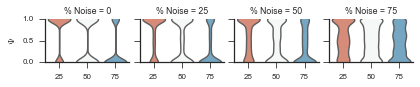

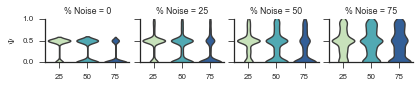

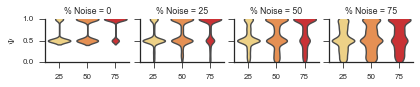

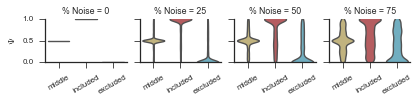

In [62]:
for group, df in tidy_subset.groupby('id0'):
    palette = None
    six.print_(group)
    
    if group == 'bimodal':
        palette = "RdBu"
    elif group == 'middle0':
        palette = 'YlGnBu'
    elif group == 'middle1':
        palette = 'YlOrRd'
    elif group == 'perfect':
        palette = [MODALITY_TO_COLOR[m] for m in df['id1'].unique()]
    
    g = sns.factorplot(x='id1', y='$\Psi$', col='% Noise', data=df, aspect=1, size=1.5,
                   kind='violin', bw=0.2, inner=None, scale='width', sharex=False, palette=palette)
    g.set(ylim=(0, 1), yticks=(0, 0.5, 1), xlabel='')
    if group == 'perfect':
        for ax in g.axes.flat:
            plt.setp(ax.get_xticklabels(), rotation=30)
    g.savefig('{}/data_{}.pdf'.format(figure_folder, group))